# load packages and data

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd')
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
jtplot.style(ticks=True, grid=False, figsize=(6.5, 5))

In [3]:
import pandas as pd
import numpy as np
train_xy = pd.read_csv("../another data/train_xy_clean.csv",index_col=["cust_group","cust_id"])
y = train_xy.y
# train_xy = pd.read_csv("./train_xy_discrete.csv",index_col=["cust_group","cust_id"])

# metrics

In [4]:
import itertools
from sklearn.metrics import classification_report,roc_curve,roc_auc_score,confusion_matrix,auc
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return plt

def eval_info(model,test_y,y_pred_prob,
                  cm,classes=y.unique(),normalize=False):
#     print("------%s classification_report------\n" % model.__class__.__name__,
#           classification_report(test_y,y_pred))
    
    plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
    print("auc:",roc_auc_score(test_y,y_pred_prob))
#     print("auc(y_pred):",roc_auc_score(test_y,y_pred))
    fpr, tpr, thresholds = roc_curve(test_y,y_pred_prob,pos_label=1)
    plt.figure()
    plt.plot(fpr, tpr, lw=2, label='ROC curve(%f)' % auc(fpr, tpr),color='r')
    plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray',label='Luck')
    plt.title("%s ROC" % model.__class__.__name__)

# discrete continous vars

x_1     AxesSubplot(0.125,0.125;0.775x0.755)
x_2     AxesSubplot(0.125,0.125;0.775x0.755)
x_80    AxesSubplot(0.125,0.125;0.775x0.755)
x_81    AxesSubplot(0.125,0.125;0.775x0.755)
x_93    AxesSubplot(0.125,0.125;0.775x0.755)
x_95    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

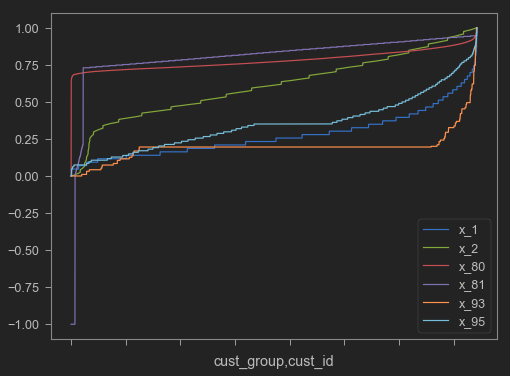

In [89]:
continous_var = ["x_1","x_2","x_80",'x_81','x_93','x_95']
plt.figure(figsize=(8,6))
train_xy[continous_var].apply(lambda x: x.sort_values().plot(legend=True))

In [5]:
def discrete_continous(data=train_xy):
    df = pd.DataFrame([],index=data.index)
    df['x_1'] = pd.cut(data['x_1'],bins=[data['x_1'].min(),0.25,data['x_1'].max()],labels=False)
    df['x_2'] = pd.cut(data['x_2'],bins=[data['x_2'].min(),0.35,data['x_2'].max()],labels=False)
    df['x_80'] = pd.cut(data['x_80'],bins=[data['x_80'].min(),0.68,data['x_80'].max()],labels=False)
    df['x_81'] = pd.cut(data['x_81'],bins=[data['x_81'].min(),0.75,data['x_81'].max()],labels=False)
    df['x_93'] = pd.cut(data['x_93'],bins=[data['x_93'].min(),0.19,0.199,data['x_93'].max()],labels=False)
    df['x_95'] = pd.cut(data['x_95'],bins=[data['x_95'].min(),0.348,0.359,data['x_93'].max()],labels=False)
    dummy_df = pd.get_dummies(df,columns=df.columns,dummy_na=True)
#     print(dummy_df.head())
    df = pd.concat([data,dummy_df],axis=1)
    return df
train_xy = discrete_continous()

In [6]:
# train_xy.to_csv('./train_xy_discrete.csv')
train_xy.head()
# len(train_xy.columns.unique())

y       x_1       x_2  x_3  x_5  x_6  x_7  x_8  x_9  x_11  \
cust_group cust_id                                                              
group_1    118378   0  0.279070  0.812612 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  -1.0   
group_2    122935   0  0.348837  0.810408 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  -1.0   
           124130   0  0.302326  0.609935  0.0  0.0  0.0  1.0  1.0  0.0   0.0   
           122205   0  0.302326  0.351504 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  -1.0   
           124049   0  0.418605  0.654395  0.0  0.0  0.0  0.0  0.0  0.0   0.0   

                      ...     x_81_1.0  x_81_nan  x_93_0.0  x_93_1.0  \
cust_group cust_id    ...                                              
group_1    118378     ...            1         0         0         1   
group_2    122935     ...            1         0         1         0   
           124130     ...            1         0         0         1   
           122205     ...            1         0         0         1   
           124049     ...            1         0         0         1   

                    x_93_2.0  x_93_nan  x_95_0.0  x_95_1.0  x_95_2.0  x_95_nan  
cust_group cust_id                                                              
group_1    118378          0         0         1         0         0         0  
group_2    122935          0         0         1         0         0         0  
           124130          0         0         1         0         0         0  
           122205          0         0         1         0         0         0  
           124049          0         0         0         0         1         0  

[5 rows x 161 columns]

# select important features by xgb

In [9]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

X = train_xy.drop("y",axis=1)
y = train_xy.y

train_x,test_x,train_y,test_y = train_test_split(X,y,stratify=y,random_state=222)
sfk = StratifiedKFold(n_splits=3,shuffle=True,random_state=111)

In [10]:
dtrain = xgb.DMatrix(train_x,label=train_y)
dtest = xgb.DMatrix(test_x)

def xgb_feature_select(iter_n):
    # set params range
    random_seed = np.arange(1000,10000,100)
    gamma = np.linspace(0.045,0.055,10)
    max_depth = [2,3,4] 
    eta = np.linspace(0.01,0.03,10)
    min_child_weight= [5,4,6] 
    alpha =[6,7,8]
    lambd = [4,5,6]
    subsample = [0.7,0.75,0.8,0.85]
    colsample_bytree = [0.6,0.65,0.7,0.75]

    np.random.shuffle(random_seed)
    np.random.shuffle(gamma)
    np.random.shuffle(max_depth)
    np.random.shuffle(alpha)
    np.random.shuffle(lambd)
    np.random.shuffle(eta)
    np.random.shuffle(subsample)
    np.random.shuffle(colsample_bytree)
    np.random.shuffle(min_child_weight)
    
    feature_score_df = pd.DataFrame()
    pred_prob_df = pd.DataFrame()
    c = 0 
    for i in range(iter_n):
        params={
            'booster':'gbtree',
            'objective': 'binary:logistic',
            'scale_pos_weight': float(len(train_y)-sum(train_y))/float(sum(train_y)),
            'eval_metric': 'auc',
            'gamma':gamma[i%10],
            'max_depth':max_depth[i%3],
            'alpha':alpha[i%3],
            'lambda':lambd[i%3],
            'subsample':subsample[i%4],
            'colsample_bytree':colsample_bytree[i%4],
            'min_child_weight':min_child_weight[i%3], 
            'eta': eta[i%10],
            'seed':random_seed[i],
            'silent':1,
            'missing':-1,
        }

        xgb_model = xgb.train(params,dtrain,num_boost_round=1200,
                              early_stopping_rounds=600,evals=[(dtrain,"train")],verbose_eval=80)
        
        y_pred_prob = pd.Series(xgb_model.predict(dtest),index=test_x.index)
        pred_prob_df = pd.concat([pred_prob_df,y_pred_prob],axis=1)
        auc = roc_auc_score(test_y,y_pred_prob)

        if auc<0.8:
            c+=1
            print('----------第%i次中断训练循环--------' % c )
            continue
        #save feature score to df
        feature_score = pd.Series(xgb_model.get_fscore())
        feature_score_df = pd.concat([feature_score_df,feature_score],axis=1)
    
    feature_score_sum = feature_score_df.fillna(0).sum(axis=1).sort_values(ascending=False)
    feature_score_sum.index.name = "features"
    feature_score_sum.name = "scores_sum"
    feature_score_sum.to_excel("./important_feature_score_xgb.xlsx")
    
    mean_prob = pred_prob_df.fillna(0).mean(axis=1)
    y_pred = np.where(mean_prob>0.5,1,0)
    cm = confusion_matrix(test_y,y_pred)
    eval_info(xgb_model,test_y,mean_prob,cm)
    
    #plot feature importance
    plt.figure(figsize=(10,10))
    xgb.plot_importance(feature_score_sum[:20].to_dict())
    plt.grid(False)
    plt.show()
    return feature_score_sum

[0]	train-auc:0.799941
Will train until train-auc hasn't improved in 600 rounds.
[80]	train-auc:0.87299
[160]	train-auc:0.896255
[240]	train-auc:0.916806
[320]	train-auc:0.934364
[400]	train-auc:0.947993
[480]	train-auc:0.959077
[560]	train-auc:0.966398
[640]	train-auc:0.973304
[720]	train-auc:0.978474
[800]	train-auc:0.983023
[880]	train-auc:0.986719
[960]	train-auc:0.989119
[1040]	train-auc:0.991432
[1120]	train-auc:0.993218
[1199]	train-auc:0.994586
[0]	train-auc:0.771883
Will train until train-auc hasn't improved in 600 rounds.
[80]	train-auc:0.838981
[160]	train-auc:0.860262
[240]	train-auc:0.876235
[320]	train-auc:0.889924
[400]	train-auc:0.902268
[480]	train-auc:0.911922
[560]	train-auc:0.920526
[640]	train-auc:0.928229
[720]	train-auc:0.935021
[800]	train-auc:0.940898
[880]	train-auc:0.946939
[960]	train-auc:0.951871
[1040]	train-auc:0.955724
[1120]	train-auc:0.959917
[1199]	train-auc:0.963609
[0]	train-auc:0.740569
Will train until train-auc hasn't improved in 600 rounds.
[80]

[0]	train-auc:0.790705
Will train until train-auc hasn't improved in 600 rounds.
[80]	train-auc:0.860938
[160]	train-auc:0.878255
[240]	train-auc:0.890509
[320]	train-auc:0.902987
[400]	train-auc:0.915694
[480]	train-auc:0.925809
[560]	train-auc:0.935627
[640]	train-auc:0.943788
[720]	train-auc:0.950489
[800]	train-auc:0.957143
[880]	train-auc:0.962239
[960]	train-auc:0.96735
[1040]	train-auc:0.97198
[1120]	train-auc:0.975452
[1199]	train-auc:0.978793
[0]	train-auc:0.768831
Will train until train-auc hasn't improved in 600 rounds.
[80]	train-auc:0.828211
[160]	train-auc:0.840768
[240]	train-auc:0.852295
[320]	train-auc:0.860608
[400]	train-auc:0.870034
[480]	train-auc:0.878277
[560]	train-auc:0.885539
[640]	train-auc:0.892134
[720]	train-auc:0.897554
[800]	train-auc:0.903157
[880]	train-auc:0.908573
[960]	train-auc:0.913159
[1040]	train-auc:0.917617
[1120]	train-auc:0.922089
[1199]	train-auc:0.926362
[0]	train-auc:0.699258
Will train until train-auc hasn't improved in 600 rounds.
[80]	

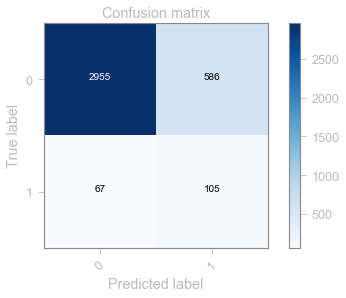

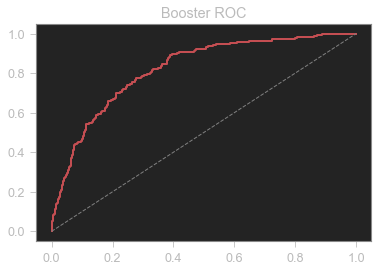

<Figure size 720x720 with 0 Axes>

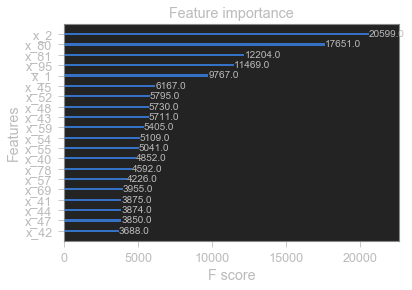

In [11]:
feature_scores = xgb_feature_select(iter_n=30)

In [17]:
important_features = feature_scores[:50].index
print(important_features)

Index(['x_2', 'x_80', 'x_81', 'x_95', 'x_1', 'x_45', 'x_52', 'x_48', 'x_43',
       'x_59', 'x_54', 'x_55', 'x_40', 'x_78', 'x_57', 'x_69', 'x_41', 'x_44',
       'x_47', 'x_42', 'x_53', 'x_50', 'x_35', 'x_68', 'x_56', 'x_79', 'x_60',
       'x_63', 'x_64', 'x_62', 'x_46', 'x_58', 'x_51', 'x_61', 'x_93', 'x_36',
       'x_66', 'x_29', 'x_30', 'x_99_1.0', 'x_84', 'x_67', 'x_65', 'x_19',
       'x_83', 'x_24', 'x_97_1.0', 'x_93_1.0', 'x_86', 'x_88'],
      dtype='object', name='features')


In [18]:
important_X = X[important_features]
important_X.head()

x_2      x_80      x_81      x_95       x_1  x_45  \
cust_group cust_id                                                           
group_1    118378   0.812612  0.733568  0.821168  0.074468  0.279070   7.0   
group_2    122935   0.810408  0.874413  0.813869  0.287234  0.348837   3.0   
           124130   0.609935  0.795775  0.901460  0.319149  0.302326   3.0   
           122205   0.351504  0.840376  0.930657  0.297872  0.302326   2.0   
           124049   0.654395  0.796948  0.799270  0.542553  0.418605   8.0   

                    x_52  x_48  x_43  x_59  ...   x_84  x_67  x_65  x_19  \
cust_group cust_id                          ...                            
group_1    118378    4.0   8.0   8.0   2.0  ...    1.0   1.0   1.0  -1.0   
group_2    122935    6.0   4.0  10.0   8.0  ...    1.0   1.0   1.0  -1.0   
           124130    2.0   4.0  10.0   3.0  ...    2.0   5.0   2.0   1.0   
           122205    8.0   8.0   9.0   8.0  ...    1.0   9.0   3.0  -1.0   
           124049    1.0  10.0   8.0   8.0  ...    1.0   9.0   2.0   1.0   

                    x_83  x_24  x_97_1.0  x_93_1.0  x_86  x_88  
cust_group cust_id                                              
group_1    118378    1.0  -1.0         1         1   1.0   1.0  
group_2    122935    1.0  -1.0         0         0   1.0   1.0  
           124130    6.0   1.0         1         1   1.0   1.0  
           122205    1.0  -1.0         0         1   1.0   1.0  
           124049    1.0   1.0         0         1   1.0   1.0  

[5 rows x 50 columns]

# generate polynomial features

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly  = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)
# poly  = PolynomialFeatures(degree=3,include_bias=False)
poly_features = poly.fit_transform(important_X)

In [20]:
new_X_cols = poly.get_feature_names(input_features=important_X.columns)
new_X = pd.DataFrame(poly_features,index=important_X.index,columns=new_X_cols).drop(important_X.columns,axis=1)
new_X.head()

x_2 x_80  x_2 x_81  x_2 x_95   x_2 x_1  x_2 x_45  \
cust_group cust_id                                                     
group_1    118378   0.596106  0.667290  0.060514  0.226775  5.688281   
group_2    122935   0.708631  0.659565  0.232777  0.282700  2.431223   
           124130   0.485371  0.549832  0.194660  0.184399  1.829806   
           122205   0.295396  0.327130  0.104703  0.106269  0.703009   
           124049   0.521519  0.523039  0.355044  0.273933  5.235163   

                    x_2 x_52  x_2 x_48  x_2 x_43  x_2 x_59  x_2 x_54  \
cust_group cust_id                                                     
group_1    118378   3.250446  6.500892  6.500892  1.625223  6.500892   
group_2    122935   4.862446  3.241630  8.104076  6.483261  6.483261   
           124130   1.219871  2.439742  6.099355  1.829806  2.439742   
           122205   2.812035  2.812035  3.163539  2.812035  3.163539   
           124049   0.654395  6.543953  5.235163  5.235163  3.271977   

                      ...      x_24 x_97_1.0  x_24 x_93_1.0  x_24 x_86  \
cust_group cust_id    ...                                                
group_1    118378     ...               -1.0           -1.0       -1.0   
group_2    122935     ...               -0.0           -0.0       -1.0   
           124130     ...                1.0            1.0        1.0   
           122205     ...               -0.0           -1.0       -1.0   
           124049     ...                0.0            1.0        1.0   

                    x_24 x_88  x_97_1.0 x_93_1.0  x_97_1.0 x_86  \
cust_group cust_id                                                
group_1    118378        -1.0                1.0            1.0   
group_2    122935        -1.0                0.0            0.0   
           124130         1.0                1.0            1.0   
           122205        -1.0                0.0            0.0   
           124049         1.0                0.0            0.0   

                    x_97_1.0 x_88  x_93_1.0 x_86  x_93_1.0 x_88  x_86 x_88  
cust_group cust_id                                                          
group_1    118378             1.0            1.0            1.0        1.0  
group_2    122935             0.0            0.0            0.0        1.0  
           124130             1.0            1.0            1.0        1.0  
           122205             0.0            1.0            1.0        1.0  
           124049             0.0            1.0            1.0        1.0  

[5 rows x 1225 columns]

# select important polynomial features

In [21]:
train_x_new,test_x_new,train_y_new,test_y_new = train_test_split(new_X,y,stratify=y,random_state=888)

best score: 0.761209 
 best model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.05, learning_rate=0.2,
       max_delta_step=0, max_depth=7, min_child_weight=1, missing=-1,
       n_estimators=250, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=800,
       reg_lambda=600, scale_pos_weight=20.669260700389106, seed=None,
       silent=True, subsample=0.8)


F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


auc: 0.8096426906076986
train_score: 0.6526306338660441 
 test_score: 0.6571505521141934


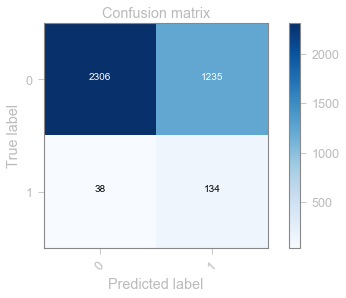

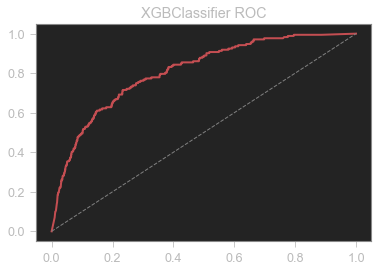

In [26]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'booster':['gbtree'],
    'objective': ['binary:logistic'],
    'n_estimators':[250],
    'max_depth':[7],
    'learning_rate':[0.2],
#     'min_child_weight':[3],
    'gamma':[0.05],
    'subsample': [0.8],
    'colsample_bytree': [0.7],
    'reg_alpha': [800],
    'reg_lambda': [600],
    'scale_pos_weight':[float(len(train_y)-sum(train_y))/float(sum(train_y))],
    'random_state':[0],
    'n_jobs': [-1],
    'missing': [-1],
    'silent':[True],
}
    
XGB = GridSearchCV(XGBClassifier(),param_grid,cv=sfk,scoring='roc_auc')#,iid=False)
XGB.fit(train_x_new,train_y_new)

print("best score: %f \n best model: %s" % (XGB.best_score_, XGB.best_estimator_))

XGB_best = XGB.best_estimator_
y_pred = XGB_best.predict(test_x_new)
y_pred_prob = XGB_best.predict_proba(test_x_new)[:,1]
train_score = XGB_best.score(train_x_new,train_y_new)
test_score = XGB_best.score(test_x_new,test_y_new)

cm = confusion_matrix(test_y_new,y_pred)

eval_info(XGB_best,test_y_new,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

In [28]:
new_features_score = pd.Series(XGB_best.feature_importances_,index=new_X.columns).sort_values(ascending=False)
print(new_features_score.value_counts())
new_features = new_X[new_features_score[:45].index]
new_features.columns

0.000000    1180
0.010526      27
0.031579       7
0.021053       7
0.042105       2
0.147368       1
0.115789       1
dtype: int64


Index(['x_80 x_99_1.0', 'x_80 x_86', 'x_35 x_63', 'x_53 x_35', 'x_61 x_19',
       'x_79 x_19', 'x_97_1.0 x_93_1.0', 'x_80 x_52', 'x_52 x_35', 'x_62 x_19',
       'x_40 x_51', 'x_61 x_24', 'x_54 x_29', 'x_35 x_51', 'x_30 x_97_1.0',
       'x_51 x_36', 'x_80 x_58', 'x_80 x_42', 'x_55 x_40', 'x_47 x_56',
       'x_80 x_83', 'x_52 x_84', 'x_1 x_40', 'x_54 x_55', 'x_63 x_62',
       'x_29 x_97_1.0', 'x_41 x_42', 'x_35 x_64', 'x_53 x_29', 'x_80 x_56',
       'x_1 x_44', 'x_1 x_42', 'x_50 x_19', 'x_95 x_62', 'x_69 x_29',
       'x_95 x_63', 'x_19 x_97_1.0', 'x_52 x_53', 'x_52 x_44', 'x_52 x_51',
       'x_52 x_69', 'x_47 x_51', 'x_62 x_93_1.0', 'x_54 x_69', 'x_52 x_40'],
      dtype='object')

In [29]:
train_xy_poly = pd.concat([train_xy,new_features],axis=1)
train_xy_poly.head()

y       x_1       x_2  x_3  x_5  x_6  x_7  x_8  x_9  x_11  \
cust_group cust_id                                                              
group_1    118378   0  0.279070  0.812612 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  -1.0   
group_2    122935   0  0.348837  0.810408 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  -1.0   
           124130   0  0.302326  0.609935  0.0  0.0  0.0  1.0  1.0  0.0   0.0   
           122205   0  0.302326  0.351504 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  -1.0   
           124049   0  0.418605  0.654395  0.0  0.0  0.0  0.0  0.0  0.0   0.0   

                      ...      x_95 x_63  x_19 x_97_1.0  x_52 x_53  x_52 x_44  \
cust_group cust_id    ...                                                       
group_1    118378     ...       0.148936           -1.0        8.0       24.0   
group_2    122935     ...       0.287234           -0.0       48.0       54.0   
           124130     ...       0.638298            1.0        8.0       16.0   
           122205     ...       0.595745           -0.0       40.0       72.0   
           124049     ...       0.542553            0.0        3.0        9.0   

                    x_52 x_51  x_52 x_69  x_47 x_51  x_62 x_93_1.0  x_54 x_69  \
cust_group cust_id                                                              
group_1    118378        12.0        4.0       18.0            2.0        8.0   
group_2    122935        42.0       18.0       49.0            0.0       24.0   
           124130         6.0        8.0       12.0            1.0       16.0   
           122205        48.0       24.0       42.0            1.0       27.0   
           124049         3.0        5.0        9.0            1.0       25.0   

                    x_52 x_40  
cust_group cust_id             
group_1    118378        12.0  
group_2    122935        42.0  
           124130        16.0  
           122205        64.0  
           124049         6.0  

[5 rows x 206 columns]

In [30]:
train_xy_poly.to_csv("./train_xy_poly45.csv")

# transform train_x and test_all

In [13]:
train_x = pd.read_csv("../another data/train_x_clean.csv",index_col=["cust_group","cust_id"])
test_all = pd.read_csv("../another data/test_all_clean.csv",index_col=["cust_group","cust_id"])
new_features = ['x_80 x_99_1.0', 'x_80 x_86', 'x_35 x_63', 'x_53 x_35', 'x_61 x_19',
       'x_79 x_19', 'x_97_1.0 x_93_1.0', 'x_80 x_52', 'x_52 x_35', 'x_62 x_19',
       'x_40 x_51', 'x_61 x_24', 'x_54 x_29', 'x_35 x_51', 'x_30 x_97_1.0',
       'x_51 x_36', 'x_80 x_58', 'x_80 x_42', 'x_55 x_40', 'x_47 x_56',
       'x_80 x_83', 'x_52 x_84', 'x_1 x_40', 'x_54 x_55', 'x_63 x_62',
       'x_29 x_97_1.0', 'x_41 x_42', 'x_35 x_64', 'x_53 x_29', 'x_80 x_56',
       'x_1 x_44', 'x_1 x_42', 'x_50 x_19', 'x_95 x_62', 'x_69 x_29',
       'x_95 x_63', 'x_19 x_97_1.0', 'x_52 x_53', 'x_52 x_44', 'x_52 x_51',
       'x_52 x_69', 'x_47 x_51', 'x_62 x_93_1.0', 'x_54 x_69', 'x_52 x_40']

In [14]:
train_x = discrete_continous(data=train_x)
test_all = discrete_continous(data=test_all)

for col in new_features:
    cols = col.split()
    train_x[col] = train_x[cols].prod(1)
    test_all[col] = test_all[cols].prod(1)

In [17]:
train_x.to_csv("./train_x_poly45.csv")
test_all.to_csv("./test_all_poly45.csv")

In [16]:
train_x.tail()

,,x_1,x_2,x_3,x_5,x_6,x_7,x_8,x_9,x_11,x_12,...,x_95 x_63,x_19 x_97_1.0,x_52 x_53,x_52 x_44,x_52 x_51,x_52 x_69,x_47 x_51,x_62 x_93_1.0,x_54 x_69,x_52 x_40
cust_group,cust_id,,,,,,,,,,,,,,,,,,,,,
group_3,101173,0.333333,0.474814,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.435508,-1.0,4.0,8.0,4.0,18.0,4.0,0.0,27.0,6.0
group_1,104859,0.083333,0.653546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.871016,1.0,2.0,4.0,2.0,1.0,4.0,0.0,1.0,2.0
group_2,107337,0.208333,0.701392,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.815217,-0.0,99.0,99.0,121.0,33.0,33.0,0.0,15.0,110.0
group_3,102815,0.708333,0.572337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.695652,0.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0,1.0
group_1,104973,0.104167,0.471339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.435508,0.0,6.0,14.0,4.0,2.0,12.0,0.0,2.0,2.0


In [49]:
test_all.head()

x_1       x_2  x_3  x_5  x_6  x_7  x_8  x_9  x_11  \
cust_group cust_id                                                           
group_2    5808     0.125000  0.556147  0.0  0.0  0.0  2.0  2.0  0.0   0.0   
group_1    2191     0.229167  0.724851 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  -1.0   
group_2    9241     0.187500  0.821098  0.0  0.0  0.0  2.0  1.0  0.0   0.0   
           4873     0.166667  0.641844  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
           1922     0.250000  0.387929 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  -1.0   

                    x_12    ...      x_95 x_63  x_19 x_97_1.0  x_52 x_53  \
cust_group cust_id          ...                                            
group_2    5808      0.0    ...       1.404255            0.0       25.0   
group_1    2191     -1.0    ...       0.606383           -1.0        1.0   
group_2    9241      0.0    ...       0.255319            0.0       35.0   
           4873      0.0    ...       0.265957            0.0       64.0   
           1922     -1.0    ...       0.351064           -1.0        6.0   

                    x_52 x_44  x_52 x_51  x_52 x_69  x_47 x_51  x_62 x_93_1.0  \
cust_group cust_id                                                              
group_2    5808          45.0       25.0       20.0       65.0            0.0   
group_1    2191           2.0        1.0        1.0        2.0            0.0   
group_2    9241          50.0       25.0       10.0       35.0            0.0   
           4873          80.0       72.0       40.0       63.0            0.0   
           1922          18.0        6.0       10.0        9.0            0.0   

                    x_54 x_69  x_52 x_40  
cust_group cust_id                        
group_2    5808          16.0       30.0  
group_1    2191           2.0        4.0  
group_2    9241          16.0       35.0  
           4873          45.0       72.0  
           1922          20.0       16.0  

[5 rows x 205 columns]